In [1]:
import os
import cv2
import numpy as np
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import anndata as ad

In [2]:
res_dict = {'Melanoma_20_201910231430_1': '0',
 'Melanoma_20_201910231430_2': '1',
 'Melanoma_20_201910231430_3': '2',
 'Melanoma_20_201910231430_4': '2',
 'Melanoma_01_201801261128_1': '0',
 'Melanoma_01_201801261128_2': '0',
 'Melanoma_01_201801261128_3': '0',
 'Melanoma_02_201802161126_1': '2',
 'Melanoma_02_201802161126_2': '1',
 'Melanoma_02_201802161126_3': '20',
 'Melanoma_02_201802161126_4': '2',
 'Melanoma_03_201803281110_1': '0',
 'Melanoma_03_201803281110_2': '0',
 'Melanoma_03_201803281110_3': '0',
 'Melanoma_04_201804301352_1': '1',
 'Melanoma_04_201804301352_2': '1',
 'Melanoma_04_201804301352_3': '0',
 'Melanoma_05_201807051047_1': '1',
 'Melanoma_05_201807051047_2': '1',
 'Melanoma_05_201807051047_3': '0',
 'Melanoma_05_201807051047_4': '1',
 'Melanoma_06_201808230902_1': '1',
 'Melanoma_06_201808230902_2': '1',
 'Melanoma_06_201808230902_3': '0',
 'Melanoma_07_201905161343_1': '1',
 'Melanoma_07_201905161343_2': '2',
 'Melanoma_08_201905241311_1': '2',
 'Melanoma_08_201905241311_2': '2',
 'Melanoma_09_201905291344_1': '?',
 'Melanoma_09_201905291344_2': '2',
 'Melanoma_10_201905291345_1': '1',
 'Melanoma_10_201905291345_2': '2',
 'Melanoma_10_201905291345_3': '2',
 'Melanoma_10_201905291345_4': '2',
 'Melanoma_11_201906261422_1': '2',
 'Melanoma_11_201906261422_2': '1',
 'Melanoma_11_201906261422_3': '1',
 'Melanoma_11_201906261422_4': '0',
 'Melanoma_12_201907031137_1': '1',
 'Melanoma_12_201907031137_2': '2',
 'Melanoma_12_201907031137_3': '0',
 'Melanoma_12_201907031137_4': '0',
 'Melanoma_13_201907111415_1': '2',
 'Melanoma_13_201907111415_2': '2',
 'Melanoma_13_201907111415_3': '2',
 'Melanoma_13_201907111415_4': '2',
 'Melanoma_14_201907111432_1': '2',
 'Melanoma_14_201907111432_2': '2',
 'Melanoma_14_201907111432_3': '2',
 'Melanoma_14_201907111432_4': '2',
 'Melanoma_16_201908011518_1': '2',
 'Melanoma_16_201908011518_2': '1',
 'Melanoma_16_201908011518_3': '0',
 'Melanoma_16_201908011518_4': '2',
 'Melanoma_17_201909111532_1': '2',
 'Melanoma_17_201909111532_2': '1',
 'Melanoma_17_201909111532_3': '2',
 'Melanoma_17_201909111532_4': '2',
 'Melanoma_18_201909111536_1': '2',
 'Melanoma_18_201909111536_2': '2',
 'Melanoma_18_201909111536_3': '2',
 'Melanoma_18_201909111536_4': '2',
 'Melanoma_19_201910151344_1': '2',
 'Melanoma_19_201910151344_2': '2',
 'Melanoma_21_202003031436_1': '0'}

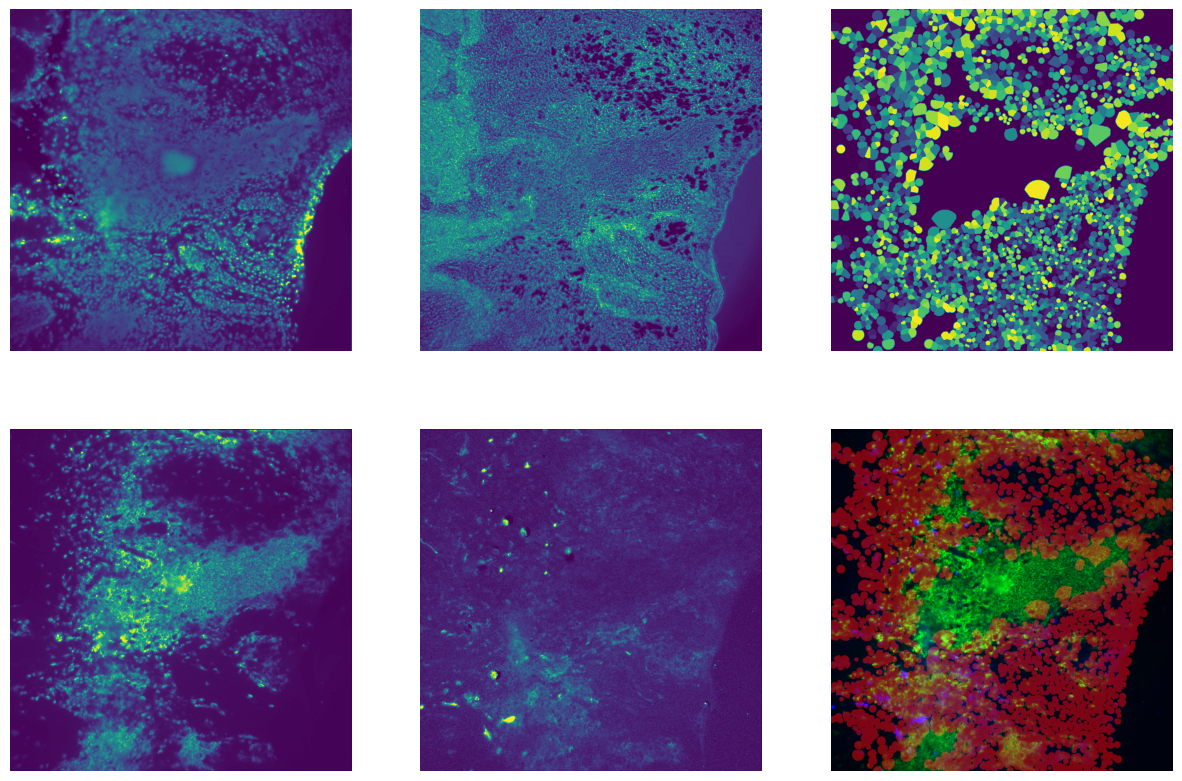

In [ ]:
#adata = ad.read_h5ad("melanoma_data/cell_type_analysis/THEORETIC/adata_THEORETIC.h5ad")
data = "/data/bionets/datasets/melc/melanoma/"
segmented = os.path.join(data, "segmented")
res_dict = dict()
for fov in os.listdir(segmented):
    if "nuclei" in fov or "pickle" in fov or os.path.isdir(os.path.join(segmented, fov)):
        continue
    
    with open(os.path.join(segmented, fov), "rb") as openfile:
        seg_file = np.load(openfile)
    
    fov_name = "_".join(fov.split("_")[:-1])
    if fov_name in res_dict.keys():
        continue
        
    try: 
        prop_iodide = cv2.imread([os.path.join(data, "processed", fov_name, f) for f in os.listdir(os.path.join(data, "processed", fov_name)) if "propidium" in f.lower()][0], cv2.IMREAD_GRAYSCALE)
        phase = cv2.imread([os.path.join(data, "processed", fov_name, f) for f in os.listdir(os.path.join(data, "processed", fov_name)) if "phase.tif" in f.lower()][0], cv2.IMREAD_GRAYSCALE)
        cd36 = cv2.imread([os.path.join(data, "processed", fov_name, f) for f in os.listdir(os.path.join(data, "processed", fov_name)) if "cd36-" in f.lower()][0], cv2.IMREAD_GRAYSCALE)
        cd3 = cv2.imread([os.path.join(data, "processed", fov_name, f) for f in os.listdir(os.path.join(data, "processed", fov_name)) if "cd3-" in f.lower()][0], cv2.IMREAD_GRAYSCALE)
    
    except Exception as e:
        print(fov, "is missing channel")
        print(e)
        continue
    
    combined = np.array([(seg_file > 0) * 125, cd3, cd36]).transpose((1, 2, 0))
    
    num_plots = 6
    f, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, img in enumerate([prop_iodide, phase, seg_file, cd3, cd36, combined]):
        axs[i // 3, i % 3].imshow(img)
        axs[i // 3, i % 3].axis("off")
    
    plt.show()
    
    user_in = input("Good?")
    if user_in == "b":
        break
    res_dict[fov_name] = user_in
    
    # Clear the previous output
    clear_output(wait=True)

In [4]:
v

NameError: name 'v' is not defined

In [ ]:
len(k[np.where(v == "2")]) / len(k)

0: almost no cells properly segmented, expression mostly in areas without cells   
1: cells segmented, expression in areas without cells   
2: cells segmented, expression mostly in this area   

In [ ]:
# Save the results
# np.save('quality.npy', res_dict)

In [ ]:
quality_dict = np.load("quality.npy", allow_pickle=True)
k = np.array(list(res_dict.keys()))
v = np.array(list(res_dict.values()))
high_quality = k[np.where(v == "2")]

In [ ]:
len(high_quality)